# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Anh Nguyen
### Preferred Name (if different): N/A
### Student ID: 015442011
### Email address: anh.t.nguyen07@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
# Name : Anh Nguyen
# Assignment : ass2
# Due Date : 03/04/2022

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

np.random.seed(42) #Code B

n = 100
X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
X2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

Y1 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

X = np.concatenate((X1, Y1), axis=0)
Y = np.concatenate((X2, Y2), axis=0)

l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2


dt2D = pd.DataFrame({'X':X, 'Y':Y, 'Class':labels}, columns=['X','Y','Class'])
dt2D.head()


X_train2D, X_test2D, Y_train2D, Y_test2D = train_test_split(dt2D, labels, test_size=0.2, random_state=0)


# X_train2D_x_coordinate_arr = []
# X_train2D_y_coordinate_arr = []

# for i in range(len(X_train2D)):
#     X_train2D_x_coordinate_arr.append(X_train2D.iloc[i][0])
#     X_train2D_y_coordinate_arr.append(X_train2D.iloc[i][1])


n = 1000
X1 = np.random.normal(loc=0.0 ,scale=3.0, size=int(n/4))
X2 = np.random.normal(loc=-3.0 ,scale=1.0, size=int(n/4))
X3 = np.random.normal(loc=-1.0 ,scale=1.0, size=int(n/4))

Y1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y2 = np.random.normal(loc=1.0, scale=2.0, size=int(n/4))
Y3 = np.random.normal(loc=1.0, scale=1.0, size=int(n/4))

Z1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Z2 = np.random.normal(loc=3.0, scale=1.0, size=int(n/4))
Z3 = np.random.normal(loc=4.0, scale=1.0, size=int(n/4))

W1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
W2 = np.random.normal(loc=5.0, scale=4.0, size=int(n/4))
W3 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))

X = np.concatenate((X1, Y1, Z1,W1), axis=0)
Y = np.concatenate((X2, Y2, Z2, W2), axis=0)
Z = np.concatenate((X3, Y3, Z3, W3), axis=0)

l1 = [0]*int(n/4)
l2 = [1]*int(n/4)
l3 = [2]*int(n/4)
l4 = [3]*int(n/4)
labels = l1+l2+l3+l4

dt3D = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z, 'Class':labels}, columns=['X','Y', 'Z','Class'])
dt3D.head()

X_train3D, X_test3D, Y_train3D, Y_test3D = train_test_split(dt3D, labels, test_size=0.2, random_state=0)

In [4]:
# calculate the distance between two points
def distance(p1, p2):
    temp = np.sum(np.square(p1-p2))
    return (np.sqrt(temp))

# KNN method
def knn(newObservation, referenceData, k):
    distances = []
    for i in range(len(referenceData)):
        dist = distance(newObservation[:-1], referenceData.iloc[i, :-1])
        distances.append((referenceData.iloc[i], dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

# prediction
def prediction(neighbors):
    votes = {}
    for neighbor in neighbors:
        response = neighbor[-1]
        if response in votes:
            votes[response] += 1
        else:
            votes[response] = 1
    sortedVotes = sorted(votes.items(), key = operator.itemgetter(1), reverse = True)
    return sortedVotes[0][0]

# calculate the accuracy in percentage
def accuracy(actual, prediction):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == prediction[i]:
            correct+=1
    return correct/float(len(actual))*100.0

# display the graph
def display(X_test, X_train, Y_test, Y_train, predictions):
    plt.subplot(1, 2, 1)
    plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
    plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
    plt.title("Actual labels")

    plt.subplot(1, 2, 2)
    plt.title("Predicted labels")
    plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
    plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=predictions, marker="v")

    plt.tight_layout()
    plt.show()

Prediction: 0  |  Actual: 0
Prediction: 0  |  Actual: 1
Prediction: 0  |  Actual: 0
Prediction: 1  |  Actual: 1
Prediction: 1  |  Actual: 1
Prediction: 1  |  Actual: 1
Prediction: 0  |  Actual: 0
Prediction: 1  |  Actual: 1
Prediction: 1  |  Actual: 1
Prediction: 1  |  Actual: 1
Prediction: 1  |  Actual: 1
Prediction: 0  |  Actual: 1
Prediction: 1  |  Actual: 1
Prediction: 0  |  Actual: 0
Prediction: 0  |  Actual: 0
Prediction: 0  |  Actual: 0
Prediction: 0  |  Actual: 0
Prediction: 0  |  Actual: 0
Prediction: 0  |  Actual: 0
Prediction: 0  |  Actual: 0
Acuracy in percentage : 90.0%


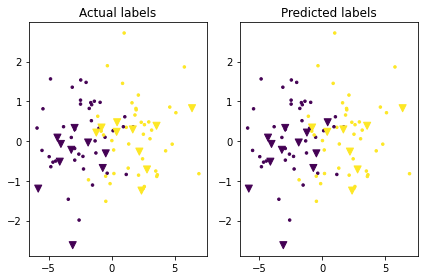

In [5]:
def main(X_test, X_train, Y_test, Y_train):
    predictions = []
    for i in range(len(X_test)):
        neighbors = knn(X_test.iloc[i], X_train, 3)
        result = prediction(neighbors)
        predictions.append(result)
        print("Prediction: " + repr(int(result)) + "  |  Actual: " + repr(Y_test[i]))
    accuracyValue = accuracy(Y_test, predictions)
    print("Acuracy in percentage : " + str(accuracyValue) + "%")

    display(X_test, X_train, Y_test, Y_train, predictions)
    
main(X_test2D, X_train2D, Y_test2D, Y_train2D)
